[Fake Bills](https://www.kaggle.com/datasets/alexandrepetit881234/fake-bills)

In [7]:
import pandas as pd
billsData=pd.read_csv("fake_bills.csv", sep=';')

In [8]:
billsData.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [65]:
import numpy as np
billsData=billsData.dropna()    #由於數據集內有包含Nan資料，因此需先移除後才可進行訓練
print(billsData.isnull().sum().sum())

X=billsData.drop(["is_genuine"],axis=1).values
Y=np.array(billsData.is_genuine)

0


In [66]:
Y=[1 if x == True else 0 for x in Y]
print(X[0:5])
print(Y[0:5])

[[171.81 104.86 104.95   4.52   2.89 112.83]
 [171.46 103.36 103.66   3.77   2.99 113.09]
 [172.69 104.48 103.5    4.4    2.94 113.16]
 [171.36 103.91 103.94   3.62   3.01 113.51]
 [171.73 104.28 103.46   4.04   3.48 112.54]]
[1, 1, 1, 1, 1]


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=66)

In [71]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy=[]
testing_accuracy=[]
n_neighbors_setting=range(1,100)

for n in n_neighbors_setting:
    KNN_Object=KNeighborsClassifier(n)
    KNN_Object.fit(X_train, Y_train)
    training_accuracy.append(KNN_Object.score(X_train, Y_train))
    testing_accuracy.append(KNN_Object.score(X_test, Y_test))

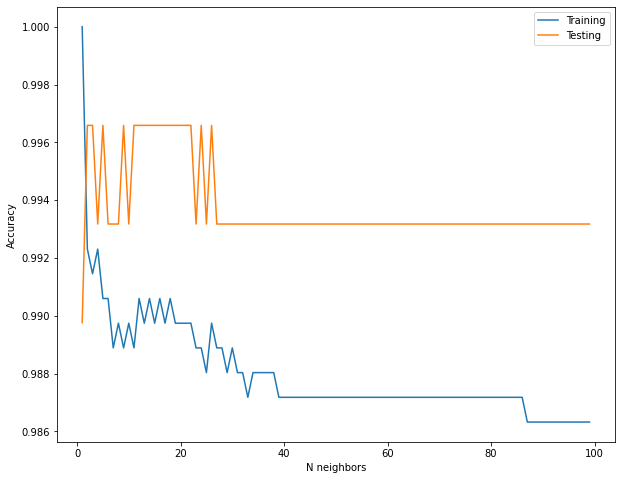

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(n_neighbors_setting, training_accuracy, label="Training")
plt.plot(n_neighbors_setting, testing_accuracy, label="Testing")
plt.xlabel("N neighbors")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.show()

In [73]:
print(f"Best accuracy {max(testing_accuracy)} at n_neighbor={testing_accuracy.index(max(testing_accuracy))+1}")

Best accuracy 0.9965870307167235 at n_neighbor=2
